In [1]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


#### INSTALL PACKAGES

In [7]:
install.packages("keras")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(keras)
library(dplyr)

# 1. Prepare the data

In [0]:
mnist   <- dataset_mnist()
x_train <- mnist$train$x          # 3d array (60000,28,28)
y_train <- mnist$train$y          # 1d array (60000)
x_test  <- mnist$test$x           # 3d array (10000,28,28)
y_test  <- mnist$test$y           # 1d array (60000)

#### reshape, rescale and one-hot encode
x_train <- keras::array_reshape(x_train, c(nrow(x_train), 784))
x_test  <- keras::array_reshape(x_test, c(nrow(x_test), 784))
x_train <- x_train/255
x_test  <- x_test/255
y_train <- keras::to_categorical(y_train, 10)
y_test  <- keras::to_categorical(y_test, 10)

# 2. Define the model

In [13]:
#### define the architecture
model <- keras_model_sequential()
model %>%
    layer_dense(units=256, activation='relu', input_shape=c(784)) %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=128, activation='relu') %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=10, activation='softmax')
summary(model)

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     200960      
________________________________________________________________________________
dropout (Dropout)                   (None, 256)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_______________

In [0]:
#### compile the model - specify the loss, the metric and the optimizer
model %>% compile(
    loss      = 'categorical_crossentropy',
    optimizer = optimizer_rmsprop(),
    metrics   = c('accuracy')
)

# 3. Training and evaluation

In [0]:
####
history <- model %>% fit(
    x                = x_train,
    y                = y_train,
    epochs           = 30,
    batch_size       = 128,
    validation_split = 0.2
)

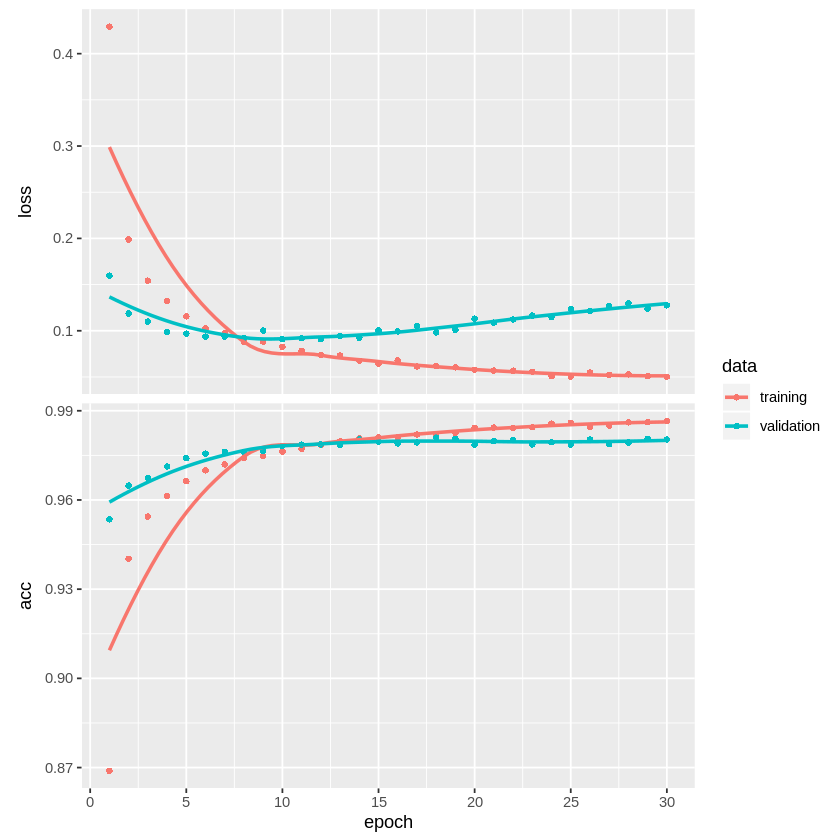

In [18]:
#### training curves
plot(history)